### Samir RABIAI M2 ISD

Les cellules pour tester notre modèle le plus performant avec les données test sont à la fin du NoteBook

In [1]:
# Bibliothèques utilisées

import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import re
import csv

In [3]:
# Modification du fichier pour avoir le format voulu

with open('train.txt') as file:
    lines = file.readlines()
    with open('train.txt', "w") as file:
        for line in lines:
            file.write(re.sub(r"\(([A-Z]+)\) (.+)", r'\1;"\2"', line))
# Upload du fichier
df = pd.read_table("train.txt", sep=";", names=["origin","text"])

Quelques visualisations

In [4]:
df.head()

,origin,text
0,GER,IThe importance and popularity of travelling i...
1,TUR,"It is an important decision , how to plan your..."
2,CHI,Some people believe that young people can enjo...
3,TEL,Travelling is usually considered as good recre...
4,ARA,i agree that . Life is a person live period of...


In [5]:
df.describe()

,origin,text
count,9900,9900
unique,11,9900
top,GER,IThe importance and popularity of travelling i...
freq,900,1


In [6]:
df["origin"].unique()

array(['GER', 'TUR', 'CHI', 'TEL', 'ARA', 'SPA', 'HIN', 'JPN', 'KOR',
       'FRE', 'ITA'], dtype=object)

In [7]:
df["origin"].value_counts()

GER    900
TUR    900
CHI    900
TEL    900
ARA    900
SPA    900
HIN    900
JPN    900
KOR    900
FRE    900
ITA    900
Name: origin, dtype: int64

Preprocessing

In [9]:
# Bibliothèques à utiliser
import contractions

import gensim

#pour lemmatiser nos mots
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# Préprocessing classique

def clean_text(text):
    
    #lowercase
    res_text = text.lower()
    #contractions
    res_text = contractions.fix(res_text)
    #remove punctuation
    res_text = re.sub(r'[^\w\s]', '', res_text)
    #remove stop words
    res_text = gensim.parsing.remove_stopwords(res_text)
    #lemmatization
    lemmatizer = WordNetLemmatizer()
    res_text = nltk.word_tokenize(res_text)
    res_text = ' '.join([lemmatizer.lemmatize(w) for w in res_text])
    #remove words that are 2 letters or less
    res_text = res_text.split(' ')
    res_text = [word for word in res_text if len(word) > 2]
    res_text = " ".join(res_text)
    return res_text


In [11]:
cleaned_text = [clean_text(df.iloc[i]['text']) for i in range(len(df))]
df['cleaned_text'] = cleaned_text

Modèles simples


Régression logistique avec CountVectorizer et TF-IDF


In [12]:
# Word embedding 
# Utilisation des algo CountVecterozier et TF-IDF

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

X = df['cleaned_text'].values.tolist()
Y = df['origin'].values.tolist()

In [13]:

# TF IDF
tf = TfidfVectorizer(max_df= 0.8)
tf_X = tf.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=29)

In [15]:

# Utilisation du modèle de régression logistique

from sklearn.linear_model import LogisticRegression

tf_train = tf.transform(X_train)
tf_test = tf.transform(X_test)

lr = LogisticRegression( max_iter= 2000)
tfidf_lr = lr.fit(tf_train, y_train)


print(tfidf_lr)

LogisticRegression(max_iter=2000)


In [16]:
tf_y_pred = tfidf_lr.predict(tf_test)

In [17]:
from sklearn import metrics
print("Logistic Regression with TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, tf_y_pred))
print('f1_score : ', metrics.f1_score(y_test, tf_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, tf_y_pred, average= 'macro'))



Logistic Regression with TF IDF Embedding
accuracy :  0.6348484848484849
f1_score :  0.6338006026358741
precision score :  0.6344140477090864


In [18]:
# CountVectorizer
cv = CountVectorizer(max_df=0.8)
cv_X = cv.fit_transform(X)
cv_train = cv.transform(X_train)
cv_test = cv.transform(X_test)
cv_lr = lr.fit(cv_train, y_train)
cv_y_pred = cv_lr.predict(cv_test)

In [19]:
print("Logistic Regression with CountVectorizer Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, cv_y_pred))
print('f1_score : ', metrics.f1_score(y_test, cv_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, cv_y_pred, average= 'macro'))

Logistic Regression with CountVectorizer Embedding
accuracy :  0.6338383838383839
f1_score :  0.6333020588788121
precision score :  0.6341029046192708


SVM avec TF-IDF et CountVectorizer

In [20]:
# Modèle SVM avec TF IDF

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 29)
classifier.fit(tf_train, y_train)
#Prediction sur le Test set
tf_y_pred = classifier.predict(tf_test)

In [21]:

print("SVM with TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, tf_y_pred))
print('f1_score : ', metrics.f1_score(y_test, tf_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, tf_y_pred, average= 'macro'))

SVM with TF IDF Embedding
accuracy :  0.6454545454545455
f1_score :  0.6454749463817382
precision score :  0.6485534180766808


In [22]:
classifier.fit(cv_train, y_train)
#Prediction sur le Test set
cv_y_pred = classifier.predict(cv_test)

In [23]:

print("SVM with CountVectorizer Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, cv_y_pred))
print('f1_score : ', metrics.f1_score(y_test, cv_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, cv_y_pred, average= 'macro'))

SVM with CountVectorizer Embedding
accuracy :  0.5595959595959596
f1_score :  0.5580680258051905
precision score :  0.5608032337650032


Regression logistique avec Word2Vec Embedding

In [41]:
import multiprocessing

from gensim.models import Word2Vec

import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.tokenize import sent_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
# Utilisation de modèle pré-entrainé
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [43]:
# Construction de notre corpus
corpus = [sent_tokenize(text) for text in df.cleaned_text.values.tolist()]

In [44]:
print(corpus[0])

['ithe importance popularity travelling raising everybody interested getting know country continent way differently agree statement best way travel group led tour guide travel group tour guide know famous place know interesting thing country decided visit tour guide organise thing appointment group aspect know lot interesting people travel group easy know people usually sit bus sleep hotel like borring travel group decide travel group visit country dangerouses tour guide inform dangerouses avoid risk special rule thing bring trouble follow furthermore tour guide help communication problem able speak language people country visit speak tour guide help able speak visit doctor police happended ask tour guide able help reason prefer tavel group tour guide']


In [79]:
# Nous allons remplir deux listes, une avec les mots constituants le corpus, l'autre avec les labels
# words va nous servir à initialiser notre modèle avec une fenetre de 3 et une répetition minimum de mots de 1

words = []
labels = []
for txt,label in zip(df.cleaned_text.values.tolist(), df.origin.values.tolist()):
    sent_txt = sent_tokenize(txt)
    for word in sent_txt:
        words.append(simple_preprocess(word))
        labels.append(label)

model_w2v = gensim.models.Word2Vec(words, window = 3, min_count = 1)

In [80]:
model_w2v.corpus_count
print(len(words))
print(len(labels))

9900
9900


In [81]:
def text_embeddings(text,model_w2v, method:str = 'avg'):
    """ 
    Return the Text vector using the average or sum of word embeddings given by Word2Vec
    """
    if method == 'avg':
        return np.mean([model_w2v[word] for word in text if word in model_w2v.index_to_key], axis = 0)
    return np.sum([model_w2v[word] for word in text if word in model_w2v.index_to_key], axis = 0)

In [82]:
df["origin"].unique()

array(['GER', 'TUR', 'CHI', 'TEL', 'ARA', 'SPA', 'HIN', 'JPN', 'KOR',
       'FRE', 'ITA'], dtype=object)

In [83]:
# Nous allons créer nos vecteurs en utilisant la moyenne des word embeddings donnés par le modèle 
# A noter que cette cellule prend environs 25 min à s'executer 
X_texts = [text_embeddings(text,wv) for text in words]
X_texts = np.array(X_texts)
label_dict  ={'GER':0, 'TUR':1,'CHI': 2, 'TEL':3,'ARA': 4, 'SPA':5, 'HIN':6,'JPN': 7, 'KOR':8,'FRE': 9, 'ITA': 10}
y_texts = [label_dict[label] for label in labels]
y_texts = y_texts
X_train, X_test, y_train, y_test = train_test_split(X_texts, y_texts, test_size =0.2)

In [84]:
X_texts.shape

(9900, 300)

In [85]:
# Nous allons voir la performance du modèle de regression logistique avec les vecteurs Word2Vec (embedding vectors)
lr_w2v = LogisticRegression(max_iter=20000)

In [86]:
X_test_corr = []
y_test_corr = []
for i,y in zip(X_test,y_test):
    X_test_corr.append(i)
    y_test_corr.append(y)

In [87]:
X_train_corr = []
y_train_corr = []
for i,y in zip(X_train,y_train):
    X_train_corr.append(i)
    y_train_corr.append(y)

In [88]:
X_train_corr = np.array(X_train_corr)
X_test_corr = np.array(X_test_corr)

np.shape(y_texts)

(9900,)

In [89]:
y_train_corr = np.array(y_train_corr)
lr_w2v.fit(X_train_corr, y_train_corr)

LogisticRegression(max_iter=20000)

In [90]:
lr_w2v.predict(X_test_corr)

array([ 8,  4, 10, ...,  1,  8,  9])

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_corr,lr_w2v.predict(X_test_corr))

0.3712121212121212

Accuracy word2vec avec window = 10 et logisticRegression  0.38282828282828285 d'accuracy et 66 min d'éxecution 

avec window = 3   62 min accuracy score = 0.3712121212121212
                  

### Modifications preprocessing (pas de stemming ni lemmatization, laisser les stopwords) 
Nous allons refaire certains étapes précedentes mais cette fois ci avec un preprocessing plus adapté à notre tâche \
Vous pouvez commencer à exectuer à partir de cette cellule ou relancer le kernel


In [78]:
# Bibliothèques utilisées

import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import re
import csv
import contractions
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [2]:
# Modification du fichier pour avoir le format voulu

with open('train.txt') as file:
    lines = file.readlines()
    with open('train.txt', "w") as file:
        for line in lines:
            file.write(re.sub(r"\(([A-Z]+)\) (.+)", r'\1;"\2"', line))
# Upload du fichier
df = pd.read_table("train.txt", sep=";", names=["origin","text"])

In [4]:
#Preprocessing
# Bibliothèques à utiliser


def clean_text(text):
    
    #lowercase
    res_text = text.lower()
    #contactions
    res_text = contractions.fix(res_text)
    #remove punctuation
    res_text = re.sub(r'[^\w\s]', '', res_text)

    return res_text


In [5]:
cleaned_text = [clean_text(df.iloc[i]['text']) for i in range(len(df))]
df['cleaned_text'] = cleaned_text

In [15]:


X = df['cleaned_text'].values.tolist()
Y = df['origin'].values.tolist()
# TF IDF
tf = TfidfVectorizer(max_df= 0.8)
tf_X = tf.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=29)

In [80]:

# Utilisation du modèle de régression logistique


tf_train = tf.transform(X_train)
tf_test = tf.transform(X_test)

lr = LogisticRegression( max_iter= 2000)
tfidf_lr = lr.fit(tf_train, y_train)


print(tfidf_lr)

LogisticRegression(max_iter=2000)


In [18]:
tf_y_pred = tfidf_lr.predict(tf_test)
from sklearn import metrics
print("Logistic Regression with TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, tf_y_pred))
print('f1_score : ', metrics.f1_score(y_test, tf_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, tf_y_pred, average= 'macro'))

Logistic Regression with TF IDF Embedding
accuracy :  0.6722222222222223
f1_score :  0.6712688377376596
precision score :  0.6727870659818613


In [10]:
# Regression logistique CountVectorizer

In [11]:
# CountVectorizer
cv = CountVectorizer(max_df=0.8)
cv_X = cv.fit_transform(X)
cv_train = cv.transform(X_train)
cv_test = cv.transform(X_test)
cv_lr = lr.fit(cv_train, y_train)
cv_y_pred = cv_lr.predict(cv_test)

In [12]:
print("Logistic Regression with CountVectorizer Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, cv_y_pred))
print('f1_score : ', metrics.f1_score(y_test, cv_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, cv_y_pred, average= 'macro'))

Logistic Regression with CountVectorizer Embedding
accuracy :  0.6818181818181818
f1_score :  0.6807873532443216
precision score :  0.6815225284771577


In [13]:
# SVM with TF IDF
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 29)
classifier.fit(tf_train, y_train)
#Prediction sur le Test set
tf_y_pred = classifier.predict(tf_test)

In [16]:
print("SVM with TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, tf_y_pred))
print('f1_score : ', metrics.f1_score(y_test, tf_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, tf_y_pred, average= 'macro'))

SVM with TF IDF Embedding
accuracy :  0.6944444444444444
f1_score :  0.694127236780096
precision score :  0.6966409596481816


In [17]:
# SVM with CountVectorizer
classifier.fit(cv_train, y_train)
#Prediction sur le Test set
cv_y_pred = classifier.predict(cv_test)
print("SVM with CountVectorizer Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, cv_y_pred))
print('f1_score : ', metrics.f1_score(y_test, cv_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, cv_y_pred, average= 'macro'))

SVM with CountVectorizer Embedding
accuracy :  0.6232323232323232
f1_score :  0.6222511201629963
precision score :  0.624211558453877


N gram Embedding (BI gram et Tri gram)

In [81]:
# N gram Vectorisation with CountVectorizer
# Bi Gram

X = df['cleaned_text'].values.tolist()
Y = df['origin'].values.tolist()
# Utilisation du modèle de régression logistique
cv = CountVectorizer(max_df=0.8, ngram_range=(2,2))
cv_X = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=29)
cv_train = cv.transform(X_train)
cv_test = cv.transform(X_test)
cv_lr = lr.fit(cv_train, y_train)
cv_y_pred = cv_lr.predict(cv_test)

In [82]:
print("Logistic Regression with BiGram CountVectorizer Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, cv_y_pred))
print('f1_score : ', metrics.f1_score(y_test, cv_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, cv_y_pred, average= 'macro'))

Logistic Regression with BiGram CountVectorizer Embedding
accuracy :  0.694949494949495
f1_score :  0.694488153208655
precision score :  0.6945401001683469


In [83]:
cv = CountVectorizer(ngram_range=(3,3), max_df=0.8)
cv_X = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=29)
cv_train = cv.transform(X_train)
cv_test = cv.transform(X_test)
cv_lr = lr.fit(cv_train, y_train)
cv_y_pred = cv_lr.predict(cv_test)

In [84]:
print("Logistic Regression with TriGram CountVectorizer Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, cv_y_pred))
print('f1_score : ', metrics.f1_score(y_test, cv_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, cv_y_pred, average= 'macro'))

Logistic Regression with TriGram CountVectorizer Embedding
accuracy :  0.5782828282828283
f1_score :  0.5775888713824447
precision score :  0.5830801012078141


In [22]:
# Regression logistique avec BiGram TF IDF
tf = TfidfVectorizer(max_df=0.8, ngram_range=(2,2))
tf_X = tf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=29)
tf_train = tf.transform(X_train)
tf_test = tf.transform(X_test)
tf_lr = lr.fit(tf_train, y_train)
tf_y_pred = tf_lr.predict(tf_test)

In [23]:
print("Logistic Regression with BiGram TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, tf_y_pred))
print('f1_score : ', metrics.f1_score(y_test, tf_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, tf_y_pred, average= 'macro'))

Logistic Regression with BiGram TF IDF Embedding
accuracy :  0.6707070707070707
f1_score :  0.6712451447645873
precision score :  0.6784874610533368


SVM with TF IDF Bi Gram

In [10]:
X = df['cleaned_text'].values.tolist()
Y = df['origin'].values.tolist()
tf = TfidfVectorizer(max_df=0.8, ngram_range=(2,2))
tf_X = tf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=29)
tf_train = tf.transform(X_train)
tf_test = tf.transform(X_test)

In [11]:

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(tf_train, y_train)
tf_y_pred = classifier.predict(tf_test)

In [13]:

from sklearn import metrics
print("SVM with TriGram TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, tf_y_pred))
print('f1_score : ', metrics.f1_score(y_test, tf_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, tf_y_pred, average= 'macro'))

SVM with TriGram TF IDF Embedding
accuracy :  0.591919191919192
f1_score :  0.5926862532512902
precision score :  0.6007423570182614


Modèles simples avec Cross validation \
Possible de relancer le kernel ici

In [1]:
# SVM TFIDF BIGRAM CROSS VALIDATION

import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import re
import csv
from sklearn.model_selection import train_test_split

In [2]:
# Modification du fichier pour avoir le format voulu

with open('train.txt') as file:
    lines = file.readlines()
    with open('train.txt', "w") as file:
        for line in lines:
            file.write(re.sub(r"\(([A-Z]+)\) (.+)", r'\1;"\2"', line))
# Upload du fichier
df = pd.read_table("train.txt", sep=";", names=["origin","text"])

In [3]:

#Preprocessing
# Bibliothèques à utiliser
import contractions

def clean_text(text):
    
    #lowercase
    res_text = text.lower()
    #contactions
    res_text = contractions.fix(res_text)
    #remove punctuation
    res_text = re.sub(r'[^\w\s]', '', res_text)

    return res_text

In [4]:

cleaned_text = [clean_text(df.iloc[i]['text']) for i in range(len(df))]
df['cleaned_text'] = cleaned_text

In [5]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, KFold

tfidf = TfidfVectorizer(ngram_range=(2,2), max_df=0.8)
X = df['cleaned_text'].values.tolist()
Y = df['origin'].values.tolist()
tfidf_X = tfidf.fit_transform(X)


In [6]:
# Utilisation du modèle SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 29)

In [7]:
# KFold cross validation
K_folds = KFold(n_splits=10)

In [8]:

scores = cross_val_score(classifier, tfidf_X, Y, cv=K_folds)

In [9]:

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores)) 

Cross Validation Scores:  [0.68989899 0.72525253 0.72424242 0.71515152 0.71717172 0.72525253
 0.72121212 0.73737374 0.73333333 0.72121212]
Average CV Score:  0.721010101010101
Number of CV Scores used in Average:  10


NAIVE BAYES

In [21]:
from sklearn.naive_bayes import GaussianNB

X = df['cleaned_text'].values.tolist()
Y = df['origin'].values.tolist()
tf = TfidfVectorizer(max_df=0.8, ngram_range=(2,2))
tf_X = tf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=29)
tf_train = tf.transform(X_train)
tf_test = tf.transform(X_test)

clf = GaussianNB()
clf.fit(tf_train.toarray(), y_train)


GaussianNB()

In [22]:
nb_y_pred = clf.predict(tf_test.toarray())

In [23]:
print("Naive Bayes TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, nb_y_pred))
print('f1_score : ', metrics.f1_score(y_test, nb_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, nb_y_pred, average= 'macro'))

Naive Bayes TF IDF Embedding
accuracy :  0.40555555555555556
f1_score :  0.40388955339368027
precision score :  0.4239375565869525


RNN


In [14]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM



In [15]:
X = df['cleaned_text'].values.tolist()
Y = df['origin'].values.tolist()
tf = TfidfVectorizer()
tf_X = tf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=29)
tf_train = tf.transform(X_train)
tf_test = tf.transform(X_test)


In [16]:
tf_train = tf_train.toarray()
y_train = np.array(y_train)
tf_test = tf_test.toarray()
y_test = np.array(y_test)


In [17]:
np.shape(tf_train)[0]

7920

In [22]:
model = Sequential()

model.add(LSTM(128,input_shape=(np.shape(tf_train) ), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(11, activation='softmax'))

In [23]:
opt = tensorflow.keras.optimizers.legacy.Adam(learning_rate=1e-3, decay=1e-5)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [24]:
# Cette cellule contient une erreur 

model.fit(tf_train, y_train, epochs= 3, validation_data=(tf_test, y_test) )

Epoch 1/3


ValueError: in user code:

    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Python39\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 7920, 53814), found shape=(None, 53814)


MODELES EN CASCADE \
Restart kernel

In [39]:
# Bibliothèques utilisées

import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import re
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
import random

In [26]:
# Modification du fichier pour avoir le format voulu

with open('train.txt') as file:
    lines = file.readlines()
    with open('train.txt', "w") as file:
        for line in lines:
            file.write(re.sub(r"\(([A-Z]+)\) (.+)", r'\1;"\2"', line))

In [27]:
# Upload du fichier
df = pd.read_table("train.txt", sep=";", names=["origin","text"])

In [28]:
#Preprocessing
# Bibliothèques à utiliser
import contractions

def clean_text(text):
    
    #lowercase
    res_text = text.lower()
    #contactions
    res_text = contractions.fix(res_text)
    #remove punctuation
    res_text = re.sub(r'[^\w\s]', '', res_text)

    return res_text

In [29]:
cleaned_text = [clean_text(df.iloc[i]['text']) for i in range(len(df))]
df['cleaned_text'] = cleaned_text

In [31]:
tfidf = TfidfVectorizer(ngram_range=(2,2), max_df= 0.8)
X = df['cleaned_text'].values.tolist()
Y = df['origin'].values.tolist()
tfidf_X = tfidf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=29)


tfidf_train = tfidf.transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [7]:
# SVM

# Utilisation du modèle SVM

classifier = SVC(kernel = 'linear', random_state = 29)
classifier.fit(tfidf_train, y_train)
#Prediction sur le Test set
y_pred = classifier.predict(tfidf_test)

In [8]:
from sklearn import metrics
print("SVM with BiGram TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('f1_score : ', metrics.f1_score(y_test, y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, y_pred, average= 'macro'))

SVM with BiGram TF IDF Embedding
accuracy :  0.7156565656565657
f1_score :  0.7167747347459575
precision score :  0.7224884765980538


In [38]:
# Changement de labels

# Réunir les langues qui font partie de la même famille
# Faire une matrice de confusion pour voir les similarité

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

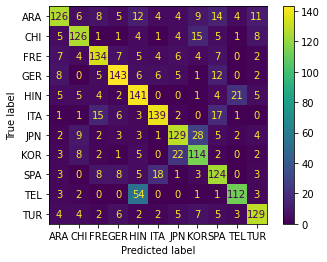

In [39]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

cm_disp.plot()

In [32]:
def language_family(lang):
    if lang == 'HIN' or lang =='TEL':
        return 'HIN/TEL'
    if lang == 'CHI' or lang == 'JPN' or lang == 'KOR':
        return 'CHI/JPN/KOR'
    if lang == 'SPA' or lang == 'ITA' or lang == 'FRE' or lang == 'GER':
        return 'FRE/GER/SPA/ITA'
    #ARA or TUR
    return 'ARA/TUR'
    

In [33]:
family = [language_family(df.iloc[i]['origin']) for i in range(len(df))]
df['family'] = family

In [34]:
df.head()

,origin,text,cleaned_text,family
0,GER,IThe importance and popularity of travelling i...,ithe importance and popularity of travelling i...,FRE/GER/SPA/ITA
1,TUR,"It is an important decision , how to plan your...",it is an important decision how to plan your ...,ARA/TUR
2,CHI,Some people believe that young people can enjo...,some people believe that young people can enjo...,CHI/JPN/KOR
3,TEL,Travelling is usually considered as good recre...,travelling is usually considered as good recre...,HIN/TEL
4,ARA,i agree that . Life is a person live period of...,i agree that life is a person live period of ...,ARA/TUR


In [35]:
# 1er modele
# Testons notre SVM avec BiGram Tf idf pour ce problème

tfidf_1 = TfidfVectorizer(ngram_range=(2,2), max_df=0.8)
X = df['cleaned_text'].values.tolist()
y_family = df['family'].values.tolist()
tfidf_1_X = tfidf_1.fit_transform(X)
X_train, X_test, y_family_train, y_family_test = train_test_split(X,y_family, test_size=0.2, random_state=29)

tfidf_1_train = tfidf_1.transform(X_train)
tfidf_1_test = tfidf_1.transform(X_test)

In [36]:
classifier = SVC(kernel = 'linear', random_state = 29)
classifier.fit(tfidf_1_train, y_family_train)
#Prediction sur le Test set
y_pred_family = classifier.predict(tfidf_1_test)

In [37]:
from sklearn import metrics
print("SVM Model 1 with BiGram TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_family_test, y_pred_family))
print('f1_score : ', metrics.f1_score(y_family_test, y_pred_family, average='macro'))
print('precision score : ', metrics.precision_score(y_family_test, y_pred_family, average= 'macro'))

SVM Model 1 with BiGram TF IDF Embedding
accuracy :  0.8621212121212121
f1_score :  0.8463468390633471
precision score :  0.87595112439363


In [ ]:
# Testons le 1er modèle par cross validation

tfidf_1 = TfidfVectorizer(ngram_range=(2,2), max_df=0.8)
X = df['cleaned_text'].values.tolist()
y_family = df['family'].values.tolist()
tfidf_1_X = tfidf_1.fit_transform(X)

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 29)
K_folds = KFold(n_splits=10)
scores = cross_val_score(classifier, tfidf_X, Y, cv=K_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores)) 

In [171]:
# Deuxieme modele
#SVM TF IDF Bi Gram
# Nous aurons 4 modèles (car 4 familles)

X_hl_train = []
X_fgsi_train = []
X_at_train = []
X_cjk_train = []

y_hl_train = [] 
y_fgsi_train = []
y_at_train = []
y_cjk_train = []

def create_train_sets_model2(X, y):
    
    for i in range(len(y)):
        if y[i] == 'HIN/TEL':
            X_hl_train.append(X[i])
            txt = X[i]
            idx = df.query('cleaned_text ==@txt')['origin'].index.values
            y_hl_train.append(df['origin'][idx[0]])
        elif y[i] == 'CHI/JPN/KOR':
            X_cjk_train.append(X[i])
            txt = X[i]
            idx = df.query('cleaned_text ==@txt')['origin'].index.values
            y_cjk_train.append(df['origin'][idx[0]])
        elif y[i] == 'FRE/GER/SPA/ITA':
            X_fgsi_train.append(X[i])
            txt = X[i]
            idx = df.query('cleaned_text ==@txt')['origin'].index.values
            y_fgsi_train.append(df['origin'][idx[0]])
        else:
            X_at_train.append(X[i])
            txt = X[i]
            idx = df.query('cleaned_text ==@txt')['origin'].index.values
            y_at_train.append(df['origin'][idx[0]])
    
    i = 0        
    while i in range(int(len(y_hl_train )/ 2)):
        rdx = random.randrange(len(y))
        if y[rdx] != 'HIN/TEL':
            X_hl_train.append(df['cleaned_text'][rdx])
            y_hl_train.append('UNK')
            i = i + 1
            
    i = 0 
    while i in range(int(len(y_cjk_train )/ 3)):
        rdx = random.randrange(len(y))
        if y[rdx] != 'CHI/JPN/KOR':
            X_cjk_train.append(df['cleaned_text'][rdx])
            y_cjk_train.append('UNK')
            i = i + 1
            
    i = 0 
    while i in range(int(len(y_at_train) / 2)):
        rdx = random.randrange(len(y))
        if y[rdx] != 'ARA/TUR':
            X_at_train.append(df['cleaned_text'][rdx])
            y_at_train.append('UNK')
            i = i + 1
            
    i = 0 
    while i in range(int(len(y_fgsi_train )/ 4)):
        rdx = random.randrange(len(y))
        if y[rdx] != 'FRE/GER/SPA/ITA':
            X_fgsi_train.append(df['cleaned_text'][rdx])
            y_fgsi_train.append('UNK')
            i = i + 1
    
    

In [172]:
X_hl_test = []
X_fgsi_test = []
X_at_test = []
X_cjk_test = []
y_hl_test = [] 
y_fgsi_test = []
y_at_test = []
y_cjk_test = []


def create_test_sets_model2(X, y):
    
    
    for i in range(len(y)):
        if y[i] == 'HIN/TEL':
            X_hl_test.append(X[i])
            txt = X[i]
            idx = df.query('cleaned_text ==@txt')['origin'].index.values
            y_hl_test.append(df['origin'][idx[0]])
        elif y[i] == 'CHI/JPN/KOR':
            X_cjk_test.append(X[i])
            txt = X[i]
            idx = df.query('cleaned_text ==@txt')['origin'].index.values
            y_cjk_test.append(df['origin'][idx[0]])
        elif y[i] == 'FRE/GER/SPA/ITA':
            X_fgsi_test.append(X[i])
            txt = X[i]
            idx = df.query('cleaned_text ==@txt')['origin'].index.values
            y_fgsi_test.append(df['origin'][idx[0]])
        else:
            X_at_test.append(X[i])
            txt = X[i]
            idx = df.query('cleaned_text ==@txt')['origin'].index.values
            y_at_test.append(df['origin'][idx[0]])
            
    i = 0        
    while i in range(int(len(y_hl_test)/ 2)):
        rdx = random.randrange(len(y))
        if y[rdx] != 'HIN/TEL':
            X_hl_test.append(df['cleaned_text'][rdx])
            y_hl_test.append('UNK')
            i = i + 1
            
    i = 0 
    while i in range(int(len(y_cjk_test )/ 3)):
        rdx = random.randrange(len(y))
        if y[rdx] != 'CHI/JPN/KOR':
            X_cjk_test.append(df['cleaned_text'][rdx])
            y_cjk_test.append('UNK')
            i = i + 1
            
    i = 0 
    while i in range(int(len(y_at_test )/ 2)):
        rdx = random.randrange(len(y))
        if y[rdx] != 'ARA/TUR':
            X_at_test.append(df['cleaned_text'][rdx])
            y_at_test.append('UNK')
            i = i + 1
            
    i = 0 
    while i in range(int(len(y_fgsi_test )/ 4)):
        rdx = random.randrange(len(y))
        if y[rdx] != 'FRE/GER/SPA/ITA':
            X_fgsi_test.append(df['cleaned_text'][rdx])
            y_fgsi_test.append('UNK')
            i = i + 1
    

In [173]:
# Création des datasets des 4 sous modèles 
create_train_sets_model2(X_train, y_family_train)
create_test_sets_model2(X_test, y_pred_family)

In [175]:
# On entraine et on test les 4 sous modèles

# Model Hindi Telugu
tfidf = TfidfVectorizer(ngram_range=(2,2), max_df= 0.8)
X = X_hl_train + X_hl_test
tfidf_X = tfidf.fit_transform(X)
tfidf_train = tfidf.transform(X_hl_train)
tfidf_test = tfidf.transform(X_hl_test)


In [176]:

classifier = SVC(kernel = 'linear', random_state = 29)
classifier.fit(tfidf_train, y_hl_train)
#Prediction sur le Test set
y_pred_hl = classifier.predict(tfidf_test)

In [177]:
from sklearn import metrics
print("SVM Model 2 Telugu Hindi with BiGram TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_hl_test, y_pred_hl))
print('f1_score : ', metrics.f1_score(y_hl_test, y_pred_hl, average='macro'))
print('precision score : ', metrics.precision_score(y_hl_test, y_pred_hl, average= 'macro'))

SVM Model 2 Telugu Hindi with BiGram TF IDF Embedding
accuracy :  0.6909361069836553
f1_score :  0.19942206131464443
precision score :  0.19996170158441964


c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
# Model Arabe turque
tfidf = TfidfVectorizer(ngram_range=(2,2), max_df= 0.8)
X = X_at_train + X_at_test
tfidf_X = tfidf.fit_transform(X)
tfidf_train = tfidf.transform(X_at_train)
tfidf_test = tfidf.transform(X_at_test)
classifier = SVC(kernel = 'linear', random_state = 29)
classifier.fit(tfidf_train, y_at_train)
#Prediction sur le Test set
y_pred_at = classifier.predict(tfidf_test)

In [180]:
from sklearn import metrics
print("SVM Model 2 Arabic Turkish with BiGram TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_at_test, y_pred_at))
print('f1_score : ', metrics.f1_score(y_at_test, y_pred_at, average='macro'))
print('precision score : ', metrics.precision_score(y_at_test, y_pred_at, average= 'macro'))

SVM Model 2 Arabic Turkish with BiGram TF IDF Embedding
accuracy :  0.6472945891783567
f1_score :  0.15818434585617477
precision score :  0.17282925782925784


c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
# Model Chinois Japonais Coréen
tfidf = TfidfVectorizer(ngram_range=(2,2), max_df= 0.8)
X = X_cjk_train + X_cjk_test
tfidf_X = tfidf.fit_transform(X)
tfidf_train = tfidf.transform(X_cjk_train)
tfidf_test = tfidf.transform(X_cjk_test)
classifier = SVC(kernel = 'linear', random_state = 29)
classifier.fit(tfidf_train, y_cjk_train)
#Prediction sur le Test set
y_pred_cjk = classifier.predict(tfidf_test)

In [182]:
from sklearn import metrics
print("SVM Model 2 Chinese Japanese and Korean with BiGram TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_cjk_test, y_pred_cjk))
print('f1_score : ', metrics.f1_score(y_cjk_test, y_pred_cjk, average='macro'))
print('precision score : ', metrics.precision_score(y_cjk_test, y_pred_cjk, average= 'macro'))

SVM Model 2 Chinese Japanese and Korean with BiGram TF IDF Embedding
accuracy :  0.6004784688995215
f1_score :  0.2111401775629068
precision score :  0.20359594118026916


c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
# Model Français allemand espagnol italien
tfidf = TfidfVectorizer(ngram_range=(2,2), max_df= 0.8)
X = X_fgsi_train + X_fgsi_test
tfidf_X = tfidf.fit_transform(X)
tfidf_train = tfidf.transform(X_fgsi_train)
tfidf_test = tfidf.transform(X_fgsi_test)
classifier = SVC(kernel = 'linear', random_state = 29)
classifier.fit(tfidf_train, y_fgsi_train)
#Prediction sur le Test set
y_pred_fgsi = classifier.predict(tfidf_test)

In [189]:
from sklearn import metrics
print("SVM Model 2 French German Spanish and Italian with BiGram TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_fgsi_test, y_pred_fgsi))
print('f1_score : ', metrics.f1_score(y_fgsi_test, y_pred_fgsi, average='macro'))
print('precision score : ', metrics.precision_score(y_fgsi_test, y_pred_fgsi, average= 'macro'))

SVM Model 2 French German Spanish and Italian with BiGram TF IDF Embedding
accuracy :  0.5543575920934412
f1_score :  0.2550747985897411
precision score :  0.8287652958373828


### Tester le modèle le plus performant sur les données tests

Vous pouvez commencer ici ou Restart le kernel

In [ ]:
# SVM TFIDF BIGRAM CROSS VALIDATION K_fold = 10 
# 46 min de compilation
# Si vous ne souhaitez pas attendre autant de temps, vous pouvez utiliser le modèle sans cross validation en bas (dernière cellule)
# 0.72 pour le validation set

import numpy as np
import pandas as pd
from matplotlib import pyplot
import contractions
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
with open('test.txt') as file:
    lines = file.readlines()
    with open('test.txt', "w") as file:
        for line in lines:
            file.write(re.sub(r"\(([A-Z]+)\) (.+)", r'\1;"\2"', line))
# Upload du fichier
df = pd.read_table("test.txt", sep=";", names=["origin","text"])

In [ ]:
#Preprocessing

def clean_text(text):
    
    #lowercase
    res_text = text.lower()
    #contactions
    res_text = contractions.fix(res_text)
    #remove punctuation
    res_text = re.sub(r'[^\w\s]', '', res_text)

    return res_text
cleaned_text = [clean_text(df.iloc[i]['text']) for i in range(len(df))]
df['cleaned_text'] = cleaned_text

In [ ]:
# Cellule à executer pour SVM avec cross validation

tfidf = TfidfVectorizer(ngram_range=(2,2), max_df=0.8)
X = df['cleaned_text'].values.tolist()
Y = df['origin'].values.tolist()
tfidf_X = tfidf.fit_transform(X)
# Utilisation du modèle SVM

classifier = SVC(kernel = 'linear', random_state = 29)
K_folds = KFold(n_splits=10)
scores = cross_val_score(classifier, tfidf_X, Y, cv=K_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores)) 

In [ ]:
# Cellule à executer pour SVM sans cross validation
X = df['cleaned_text'].values.tolist()
Y = df['origin'].values.tolist()
tf = TfidfVectorizer(max_df=0.8, ngram_range=(2,2))
tf_X = tf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=29)
tf_train = tf.transform(X_train)
tf_test = tf.transform(X_test)
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(tf_train, y_train)
tf_y_pred = classifier.predict(tf_test)
from sklearn import metrics
print("SVM with TriGram TF IDF Embedding")
print('accuracy : ', metrics.accuracy_score(y_test, tf_y_pred))
print('f1_score : ', metrics.f1_score(y_test, tf_y_pred, average='macro'))
print('precision score : ', metrics.precision_score(y_test, tf_y_pred, average= 'macro'))